In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

fp = "/content/drive/MyDrive/Infosys Springboard/Real Estate Data V21.csv"
df = pd.read_csv(fp)

display(df.head())
display(df.info())
display(df.describe())

print(df.shape)

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1021.6+ KB


None

,Total_Area,Price_per_SQFT,Baths
count,14528.000000,14528.000000,14528.000000
mean,1297.916988,11719.456222,2.751239
std,1245.694305,49036.068632,0.898243
min,70.000000,0.000000,1.000000
25%,650.000000,4480.000000,2.000000
50%,1000.000000,6050.000000,3.000000
75%,1439.000000,9312.500000,3.000000
max,35000.000000,999000.000000,6.000000


(14528, 9)


STRUCTURE: 14528 rows and 9 columns

CHANGES TO BE DONE:
- Change 'Price' datatype to int
- Extract 'BHK' info from 'Description'

In [5]:
# Step 1: Check unique suffixes (Cr, L, K, etc.)
df['Price_Unit'] = df['Price'].str.extract(r'([A-Za-z]+)')

print(df['Price_Unit'].value_counts())

null_rows = df[df['Price_Unit'].isnull()][['Price', 'Price_Unit']]
null_rows

Price_Unit
L       10294
Cr       4229
Lacs        1
k           1
Name: count, dtype: int64


,Price,Price_Unit
4277,₹2.0,NaN
5856,₹3.0,NaN
7948,₹1.0,NaN


In [6]:
df = df.dropna(subset=['Price_Unit'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14525 entries, 0 to 14527
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14525 non-null  object 
 1   Property Title  14525 non-null  object 
 2   Price           14525 non-null  object 
 3   Location        14525 non-null  object 
 4   Total_Area      14525 non-null  int64  
 5   Price_per_SQFT  14525 non-null  float64
 6   Description     14525 non-null  object 
 7   Baths           14525 non-null  int64  
 8   Balcony         14525 non-null  object 
 9   Price_Unit      14525 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB
None


In [7]:
def convert_price(value):
    value = value.replace("₹", "").strip().lower()

    if "cr" in value:
        return float(value.replace("cr", "").strip()) * 1e7   # 1 Cr = 1 Crore = 1e7
    elif "l" in value:  # handles both L and Lacs
        value = value.replace("lacs", "").replace("l", "").strip()
        return float(value) * 1e5   # 1 Lakh = 1e5
    elif "k" in value:
        return float(value.replace("k", "").strip()) * 1e3   # 1K = 1000
    else:
        return float(value)  # plain number (₹5000 etc.)

# Apply conversion
df["Price_Numeric"] = df["Price"].apply(convert_price)

print(df['Price_Numeric'].isnull)

<bound method Series.isnull of 0        19900000.0
1        22500000.0
2        10000000.0
3        33300000.0
4         4800000.0
            ...    
14523     4000000.0
14524     1400000.0
14525     3000000.0
14526     6000000.0
14527     5500000.0
Name: Price_Numeric, Length: 14525, dtype: float64>


In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14525 entries, 0 to 14527
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14525 non-null  object 
 1   Property Title  14525 non-null  object 
 2   Price           14525 non-null  object 
 3   Location        14525 non-null  object 
 4   Total_Area      14525 non-null  int64  
 5   Price_per_SQFT  14525 non-null  float64
 6   Description     14525 non-null  object 
 7   Baths           14525 non-null  int64  
 8   Balcony         14525 non-null  object 
 9   Price_Unit      14525 non-null  object 
 10  Price_Numeric   14525 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.3+ MB


None

In [9]:
df = df.drop(columns=['Price', 'Price_Unit'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14525 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14525 non-null  object 
 1   Property Title  14525 non-null  object 
 2   Location        14525 non-null  object 
 3   Total_Area      14525 non-null  int64  
 4   Price_per_SQFT  14525 non-null  float64
 5   Description     14525 non-null  object 
 6   Baths           14525 non-null  int64  
 7   Balcony         14525 non-null  object 
 8   Price_Numeric   14525 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB


EXTRACT BHK INFO:

In [24]:
# Extract pattern (BHK, BH, BK)
df['BHK_Type'] = df['Property Title'].str.extract(r'(\bBHK|\bBH|\bBK|\bHK|\bRK)')

# Count occurrences
print(df['BHK_Type'].value_counts())


null_notation_rows = df[df['BHK_Type'].isnull()][['Property Title', 'BHK_Type']]
null_notation_rows

BHK_Type
BHK    13798
RK       706
BH         4
Name: count, dtype: int64


,Property Title,BHK_Type
1186,"Studio Flat for sale in Kelambakkam, Chennai",NaN
1446,"Shop Flat for sale in Ayapakkam, Chennai",NaN
3497,Studio Independent House for sale in Yerappana...,NaN
4003,Studio Independent House for sale in Kempapura...,NaN
4005,Studio Independent House for sale in Kempapura...,NaN
5889,Studio Independent House for sale in Bommasand...,NaN
7527,"Studio Flat for sale in Goregaon West, Mumbai",NaN
7594,"Studio Flat for sale in Mazgaon, Mumbai",NaN
7614,"1 R Independent House for sale in Wadala East,...",NaN
7993,"Studio Flat for sale in Mulund East, Mumbai",NaN


In [45]:
import re
import pandas as pd

def extract_notation_and_number(title):
    title = title.lower().strip()

    # Shop or Studio → Studio with default 1
    if "shop" in title or "studio" in title:
        return ("Studio", 1)

    # Case: "5+ BHK", "3+ RK", etc.
    match_plus = re.search(r'(\d+)\+\s*(bhk|bh|rk|hk|r)', title, re.IGNORECASE)
    if match_plus:
        number = int(match_plus.group(1))   # take the base number (ignore '+')
        notation = match_plus.group(2).upper()
        return (notation, number)

    # Case: "3 BHK", "2 R", etc.
    match = re.search(r'(\d+)\s*(bhk|bh|rk|hk|r)', title, re.IGNORECASE)
    if match:
        number = int(match.group(1))
        notation = match.group(2).upper()
        return (notation, number)

    return (None, None)

# Apply function
df[["Notation", "BHK_Number"]] = df["Property Title"].apply(
    lambda x: pd.Series(extract_notation_and_number(x))
)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 14525 entries, 0 to 14527
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14525 non-null  object 
 1   Property Title  14525 non-null  object 
 2   Location        14525 non-null  object 
 3   Total_Area      14525 non-null  int64  
 4   Price_per_SQFT  14525 non-null  float64
 5   Description     14525 non-null  object 
 6   Baths           14525 non-null  int64  
 7   Balcony         14525 non-null  object 
 8   Price_Numeric   14525 non-null  float64
 9   BHK Type        14525 non-null  object 
 10  Notation        14525 non-null  object 
 11  BHK_Number      14525 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1.4+ MB
None


In [26]:
 display(df['BHK Type'].head(5))

,BHK Type
0,BHK
1,BHK
2,BHK
3,BHK
4,BHK


In [27]:
df.drop(columns=['BHK_Type'], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14525 entries, 0 to 14527
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14525 non-null  object 
 1   Property Title  14525 non-null  object 
 2   Location        14525 non-null  object 
 3   Total_Area      14525 non-null  int64  
 4   Price_per_SQFT  14525 non-null  float64
 5   Description     14525 non-null  object 
 6   Baths           14525 non-null  int64  
 7   Balcony         14525 non-null  object 
 8   Price_Numeric   14525 non-null  float64
 9   BHK Type        14525 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


In [29]:
df['BHK Type'].value_counts()

,count
BHK Type,
BHK,13798
RK,706
Studio,12
R,5
BH,4


EXPLORATORY DATA ANALYSIS

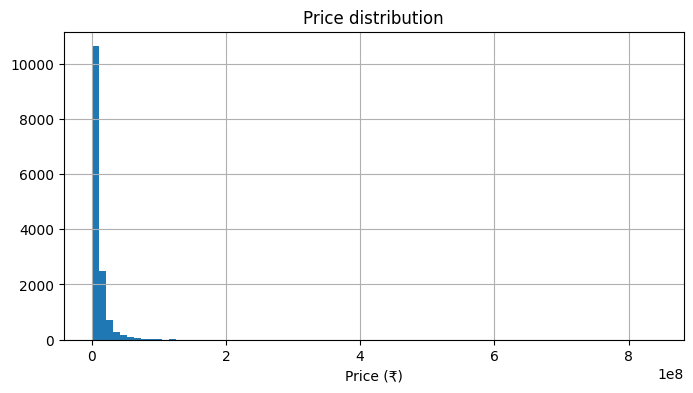

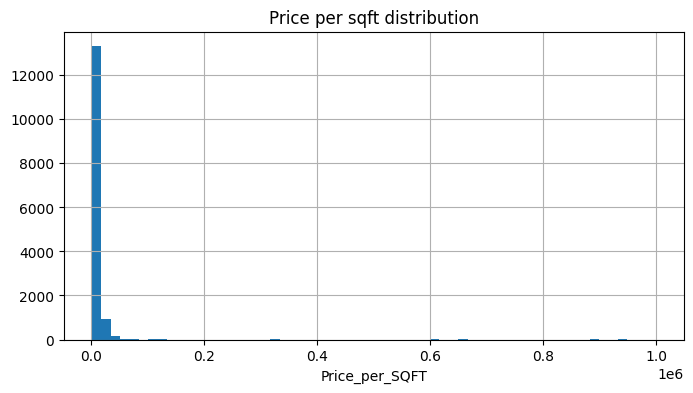

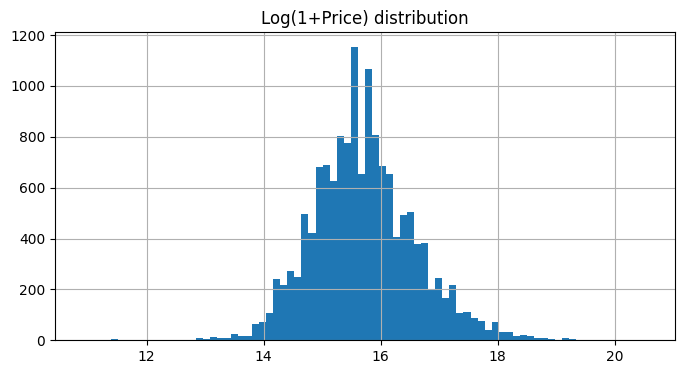

In [47]:
#Distribution of price, area and price_per_sqft
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
df['Price_Numeric'].dropna().hist(bins=80)
plt.title('Price distribution'); plt.xlabel('Price (₹)'); plt.show()

plt.figure(figsize=(8,4))
df['Price_per_SQFT'].dropna().hist(bins=60)
plt.title('Price per sqft distribution'); plt.xlabel('Price_per_SQFT'); plt.show()

# Log-transform visual if heavy skew
import numpy as np
plt.figure(figsize=(8,4))
np.log1p(df['Price_Numeric'].dropna()).hist(bins=80)
plt.title('Log(1+Price) distribution'); plt.show()


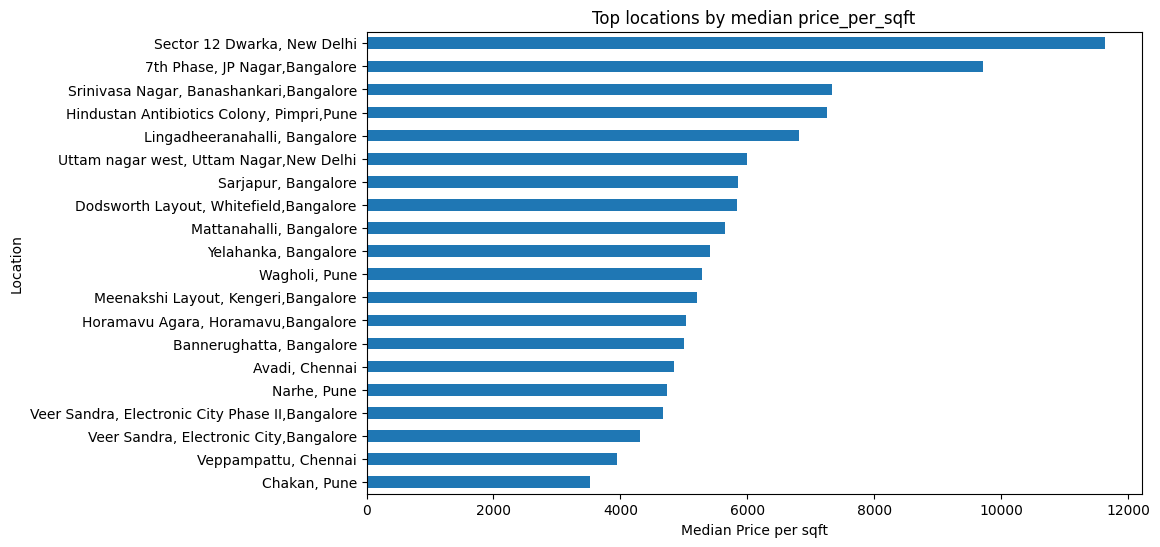

In [52]:
plt.figure(figsize=(10,6))
loc_stats['median_pps'].sort_values().plot(kind='barh')
plt.xlabel('Median Price per sqft'); plt.title('Top locations by median price_per_sqft'); plt.show()

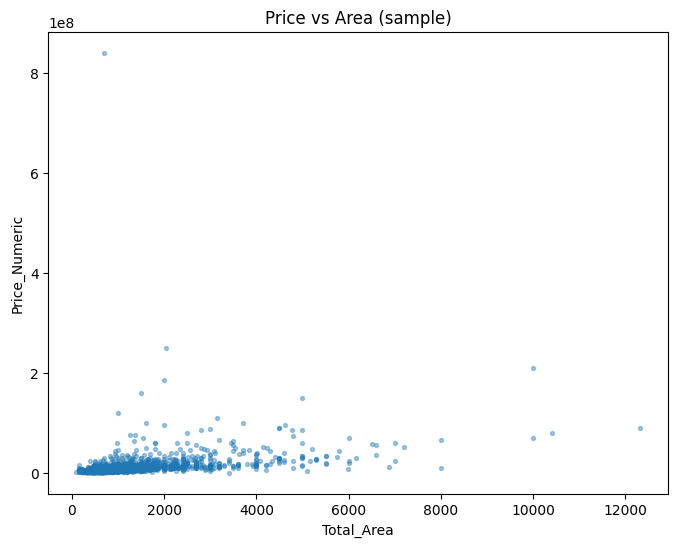

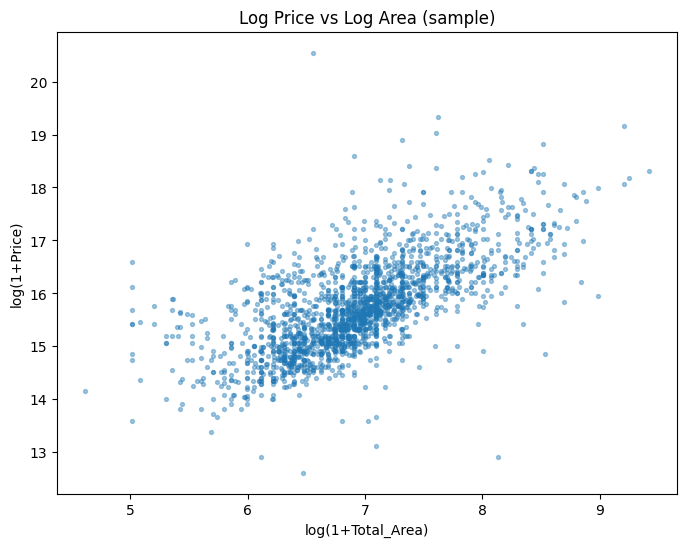

In [53]:
#Price vs Area scatter (sample to avoid overplotting)
plt.figure(figsize=(8,6))
samp = df[['Total_Area','Price_Numeric']].dropna().sample(n=2000, random_state=42)
plt.scatter(samp['Total_Area'], samp['Price_Numeric'], alpha=0.4, s=8)
plt.xscale('linear'); plt.yscale('linear')
plt.xlabel('Total_Area'); plt.ylabel('Price_Numeric')
plt.title('Price vs Area (sample)')
plt.show()

# if skewed, use log scales
plt.figure(figsize=(8,6))
plt.scatter(np.log1p(samp['Total_Area']), np.log1p(samp['Price_Numeric']), alpha=0.4, s=8)
plt.xlabel('log(1+Total_Area)'); plt.ylabel('log(1+Price)'); plt.title('Log Price vs Log Area (sample)')
plt.show()


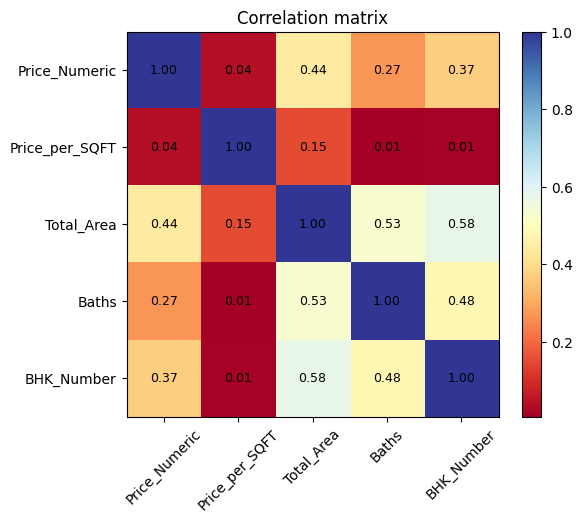

In [50]:
# heatmap using matplotlib
import numpy as np
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest', cmap='RdYlBu', aspect='auto')
plt.colorbar()
ticks = range(len(corr.columns))
plt.xticks(ticks, corr.columns, rotation=45)
plt.yticks(ticks, corr.columns)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='k', fontsize=9)
plt.title('Correlation matrix'); plt.show()
